# Audio Process
This notebooks needs the podcastmix subset to be in the same directory of this notebook. If you run all the cells from FinalProject_dataset_creation notebook the dataset should already be in the required location and you skip the cell below and go directly to the "!pip install requirements" cell. However, if you wanted to save some time and directly download the dataset, without running the FinalProject_dataset_creation notebook, you must run the cell below:

# Install required packages

In [1]:
!pip install pytorch-lightning
!pip install asteroid
!pip install ffmpeg
!pip install torchaudio

# Analize data

## Speaker dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('thesis/podcastmix/metadata/train/speech.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('thesis/podcastmix/metadata/val/speech.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('thesis/podcastmix/metadata/test/speech.csv')
test_data['subset'] = 'test'
data = pd.concat([train_data, val_data, test_data], ignore_index = True)
data.head()

,speech_ID,speaker_id,speaker_age,speaker_gender,speaker_accent,speech_path,length,subset
0,p363_138_mic2,p363,22,M,Canadian,podcastmix/train/speech/p363_138_mic2.flac,131867,train
1,p294_379_mic2,p294,33,F,American,podcastmix/train/speech/p294_379_mic2.flac,137106,train
2,p343_050_mic2,p343,27,F,Canadian,podcastmix/train/speech/p343_050_mic2.flac,150837,train
3,p300_203_mic1,p300,23,F,American,podcastmix/train/speech/p300_203_mic1.flac,177039,train
4,p245_264_mic2,p245,25,M,Irish,podcastmix/train/speech/p245_264_mic2.flac,117504,train


In [4]:
data.groupby("subset").mean()

,speaker_age,length
subset,,
test,22.649270,147415.671912
train,22.665138,148729.049758
val,22.708140,148362.043700


In [5]:
data.groupby("subset").std()

,speaker_age,length
subset,,
test,2.898600,50619.922467
train,2.945778,53414.881271
val,2.948025,51236.170995


In [6]:
data.groupby("speaker_accent").count()

,speech_ID,speaker_id,speaker_age,speaker_gender,speech_path,length,subset
speaker_accent,,,,,,,
American,16978,16978,16978,16978,16978,16978,16978
Australian,1646,1646,1646,1646,1646,1646,1646
British,796,796,796,796,796,796,796
Canadian,6302,6302,6302,6302,6302,6302,6302
English,27272,27272,27272,27272,27272,27272,27272
Indian,2328,2328,2328,2328,2328,2328,2328
Irish,7246,7246,7246,7246,7246,7246,7246
NewZealand,844,844,844,844,844,844,844
NorthernIrish,5160,5160,5160,5160,5160,5160,5160


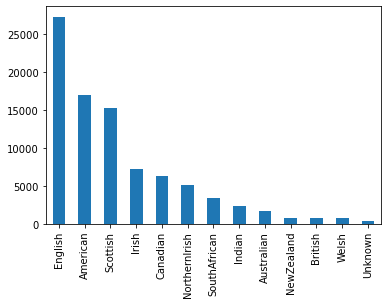

In [7]:
data['speaker_accent'].value_counts().plot(kind='bar')

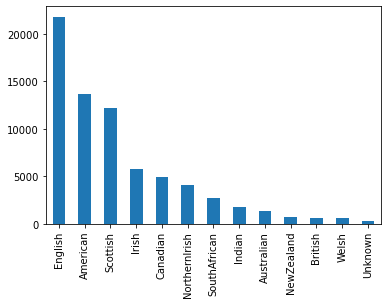

In [8]:
train_data['speaker_accent'].value_counts().plot(kind='bar')

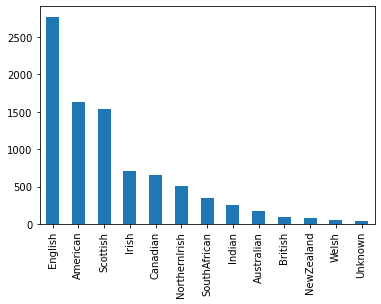

In [10]:
val_data['speaker_accent'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Gender frequency')

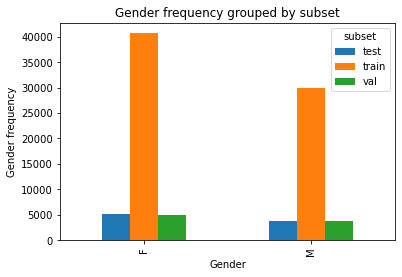

In [11]:
%matplotlib inline
pd.crosstab(data.speaker_gender, data.subset).plot(kind="bar")
plt.title("Gender frequency grouped by subset")
plt.xlabel("Gender")
plt.ylabel("Gender frequency")

Text(0, 0.5, 'Frequency')

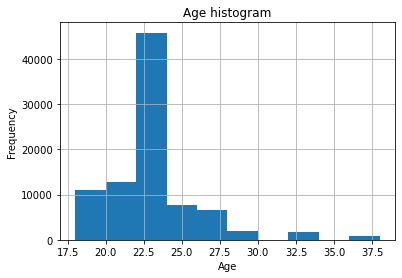

In [12]:
%matplotlib inline
data.speaker_age.hist()
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

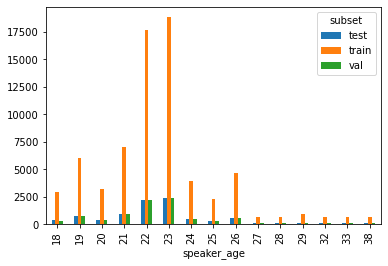

In [13]:
pd.crosstab(data.speaker_age, data.subset).plot(kind="bar")

# For the music:

In [14]:
# load music
train_data = pd.read_csv('thesis/podcastmix/metadata/train/music.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('thesis/podcastmix/metadata/val/music.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('thesis/podcastmix/metadata/test/music.csv')
test_data['subset'] = 'test'
data_csv = pd.concat([train_data, val_data, test_data], ignore_index = True)
data_csv.head()

,music_ID,jamendo_id,name,artist_name,album_name,license_ccurl,releasedate,image,vocalinstrumental,lang,gender,acousticelectric,speed,tags,music_path,length,subset
0,1000957,1000957,Key to Success - Discover the Possibility,Akashic Records,Corporate Presentation - Key To Success,http://creativecommons.org/licenses/by-nc-nd/3.0/,2013-01-20,https://images.jamendo.com/albums/s117/117782/...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""corporate""/ ""filmscore""]/ ""instru...",podcastmix/train/music/1000957.flac,7497000,train
1,1319497,1319497,Spread Your Wings,Niki J Crawford,The Genesis Block EP,http://creativecommons.org/licenses/by-nc-nd/3.0/,2016-02-18,https://images.jamendo.com/albums/s156/156458/...,vocal,en,female,NaN,medium,"{""genres"": [""soul""/ ""rnb""/ ""pop""]/ ""instrument...",podcastmix/train/music/1319497.flac,8376060,train
2,1245169,1245169,Drama,Matti Paalanen,Emotion,http://creativecommons.org/licenses/by-nc-nd/3.0/,2015-06-27,https://images.jamendo.com/albums/s149/149178/...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""filmscore""]/ ""instruments"": []/ ""...",podcastmix/train/music/1245169.flac,6098195,train
3,11751,11751,Urban,Tom La Meche,Blog,http://creativecommons.org/licenses/by-nc-nd/3.0/,2006-04-22,https://images.jamendo.com/albums/s1/1741/cove...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""jazz""/ ""nujazz""]/ ""instruments"": ...",podcastmix/train/music/11751.flac,12304128,train
4,490932,490932,chillin',Electric Grocery,enjoy,http://creativecommons.org/licenses/by-nc-sa/3.0/,2009-12-19,https://images.jamendo.com/albums/s57/57543/co...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""jazz""/ ""ambient""/ ""nujazz""]/ ""ins...",podcastmix/train/music/490932.flac,14271963,train


In [29]:
import json

'{"genres": ["filmscore"]/ "instruments": []/ "vartags": ["epic"/ "inspirational"/ "soft"]}'

In [81]:
genres_count = {}
vartags_count = {}
for i in range(len(data_csv)):
    row = data_csv.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_count:
            genres_count[genre] = 1
        else:
            genres_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_count:
            vartags_count[vartag] = 1
        else:
            vartags_count[vartag] += 1

print(genres_count)
print(vartags_count)

{'corporate': 202, 'filmscore': 1328, 'soul': 144, 'rnb': 200, 'pop': 2973, 'jazz': 889, 'nujazz': 56, 'ambient': 1119, 'classical': 1102, 'rock': 3588, 'world': 632, 'metal': 719, 'downtempo': 320, 'triphop': 396, 'indietronica': 13, 'reggae': 370, 'bossanova': 40, 'symphonic': 101, 'rocknroll': 49, 'indie': 825, 'funk': 305, 'electronic': 3212, 'folk': 1046, 'jazzfunk': 29, 'experimental': 338, 'cabaret': 9, 'idm': 43, 'singersongwriter': 414, 'dreampop': 23, 'acidjazz': 53, 'techno': 320, 'drumnbass': 142, 'breakbeat': 106, 'jungle': 66, 'newage': 481, 'grunge': 81, 'hiphop': 742, 'reggaeton': 22, 'latin': 236, 'rocksteady': 4, 'classicrock': 56, 'gothic': 70, 'synthpop': 49, 'dance': 682, 'celtic': 100, 'punk': 248, 'intro': 36, 'country': 210, 'house': 301, 'ska': 92, 'dub': 94, 'trance': 350, 'chillout': 717, 'rap': 259, 'electrofunk': 8, 'baroque': 52, 'jazzfusion': 29, 'freejazz': 6, 'dubstep': 70, 'indierock': 103, 'ragga': 32, 'mambo': 8, 'smoothjazz': 28, 'rumba': 3, 'latinj

In [63]:
import operator

In [82]:
sorted_genres = dict( sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_vartags = dict( sorted(vartags_count.items(), key=operator.itemgetter(1),reverse=True))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

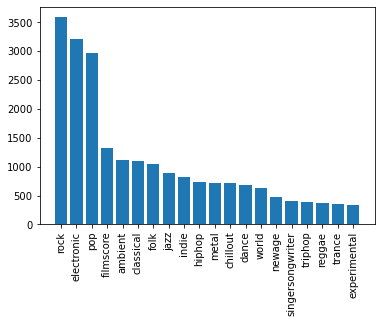

In [83]:
max_genres = 20
plt.bar(list(sorted_genres.keys())[0:max_genres], list(sorted_genres.values())[0:max_genres])
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

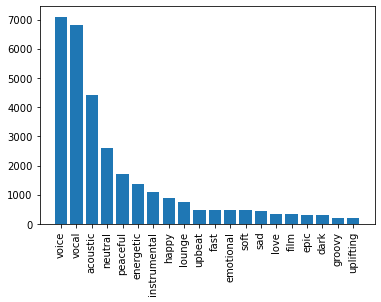

In [84]:
plt.bar(list(sorted_vartags.keys())[0:max_genres], list(sorted_vartags.values())[0:max_genres])
plt.xticks(rotation='vertical')

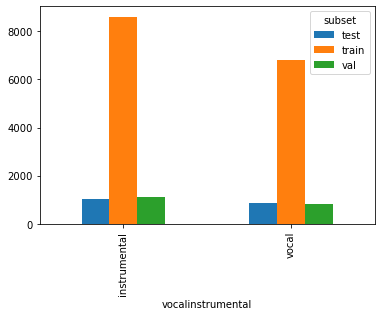

In [50]:
pd.crosstab(data_csv.vocalinstrumental, data_csv.subset).plot(kind="bar")

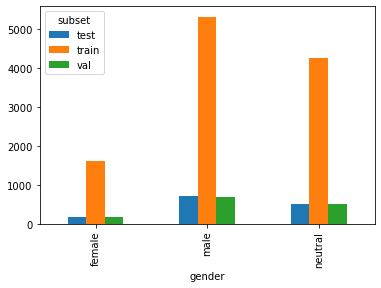

In [51]:
pd.crosstab(data_csv.gender, data_csv.subset).plot(kind="bar")

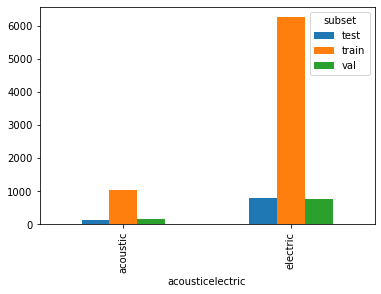

In [52]:
pd.crosstab(data_csv.acousticelectric, data_csv.subset).plot(kind="bar")

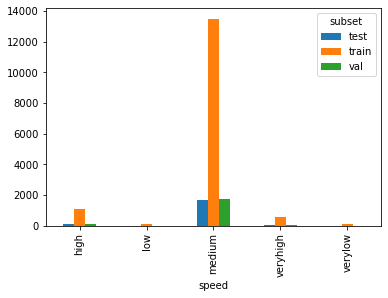

In [53]:
pd.crosstab(data_csv.speed, data_csv.subset).plot(kind="bar")